In [6]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns


In [7]:
insurance_data = pd.read_csv("/workspaces/Machine-Learning/ML1/insurance.csv")


X = insurance_data.drop(columns=["charges"])
y = insurance_data["charges"]

X = pd.get_dummies(X, columns = ["region"], drop_first=True, dtype=int)

X["sex"] = X["sex"].map({"female": 1, "male": 0})
X["smoker"] = X["smoker"].map({"yes": 1, "no": 0})

X["age_smoker"] = X["age"] * X["smoker"]
X["bmi_smoker"] = X["bmi"] * X["smoker"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MSE for alphs = 0.001: 20922599.871035974
MSE for alphs = 0.1: 20921803.69843139
MSE for alphs = 1: 20914832.635089148
MSE for alphs = 2: 20908106.779954527
MSE for alphs = 3: 20901927.931570236
MSE for alphs = 4: 20896130.81113566
MSE for alphs = 5: 20890881.000633504
MSE for alphs = 6: 20886178.838931832
MSE for alphs = 7: 20882023.667378582
MSE for alphs = 10: 20872844.794796687
MSE for alphs = 20: 20877828.53237883
MSE for alphs = 30: 20937537.13393977
MSE for alphs = 40: 21046489.293890774


<Axes: >

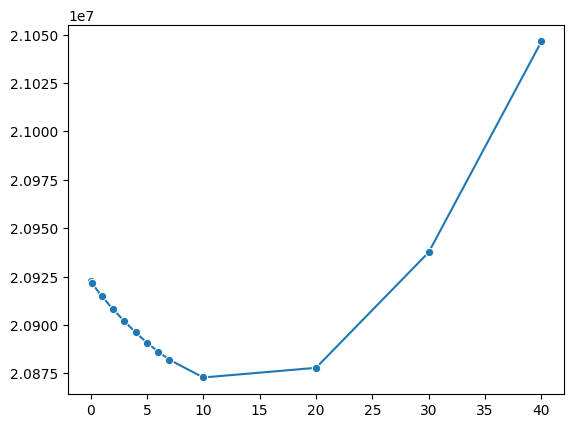

In [9]:
alphas = [0.001, 0.1, 1, 2, 3, 4, 5, 6, 7, 10, 20, 30, 40]
mses = []

for a in alphas:
    lasso_model = Lasso(alpha=a)
    lasso_model.fit(X_train, y_train)

    y_pred = lasso_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE for alphs = {a}:", mse)
    mses.append(mse)

sns.lineplot(x=alphas, y=mses, marker="o")